### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
facturacion_total = tienda["Precio"].sum()
print(f"Facturación total: ${facturacion_total:,.2f}")

Facturación total: $1,150,880,400.00


In [9]:
facturacion_total = tienda2["Precio"].sum()
print(f"Facturación total: ${facturacion_total:,.2f}")

Facturación total: $1,116,343,500.00


In [10]:
facturacion_total = tienda3["Precio"].sum()
print(f"Facturación total: ${facturacion_total:,.2f}")

Facturación total: $1,098,019,600.00


In [11]:
facturacion_total = tienda4["Precio"].sum()
print(f"Facturación total: ${facturacion_total:,.2f}")

Facturación total: $1,038,375,700.00


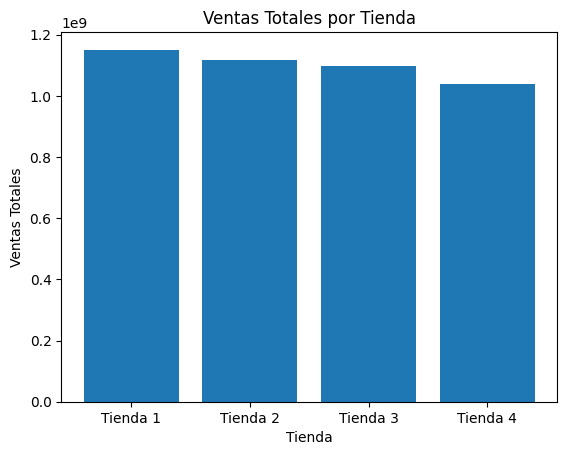

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcular las ventas totales de cada tienda
ventas_tienda = tienda['Precio'].sum()
ventas_tienda2 = tienda2['Precio'].sum()
ventas_tienda3 = tienda3['Precio'].sum()
ventas_tienda4 = tienda4['Precio'].sum()

# lista con los nombres de las tiendas y otra con las ventas totales
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventas_totales = [ventas_tienda, ventas_tienda2, ventas_tienda3, ventas_tienda4]

# gráfica de barras
plt.bar(nombres_tiendas, ventas_totales)

# Agregar título y etiquetas a los ejes
plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')

# Mostrar la gráfica
plt.show()

# 2. Ventas por categoría

In [37]:
import pandas as pd

# Cargar los archivos
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular ventas por categoría
ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum().apply(lambda x: "${:,.2f}".format(x))

print("Ventas por categoría:\n", ventas_por_categoria)

Ventas por categoría:
 Categoría del Producto
Artículos para el hogar       $57,579,800.00
Deportes y diversión         $142,977,700.00
Electrodomésticos          $1,324,751,100.00
Electrónicos               $1,660,576,500.00
Instrumentos musicales       $348,772,600.00
Juguetes                      $73,604,400.00
Libros                        $37,696,100.00
Muebles                      $757,661,000.00
Name: Precio, dtype: object


# 3. Calificación promedio de la tienda


In [27]:
import pandas as pd

# Cargar los archivos de las tiendas
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


df_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular la calificación promedio
calificacion_promedio = df_completo['Calificación'].mean()

print(f"La calificación promedio de todas las tiendas es: {calificacion_promedio:.2f}")

La calificación promedio de todas las tiendas es: 4.01


# 4. Productos más y menos vendidos

In [38]:
# Agrupar por producto y sumar las unidades vendidas
ventas_por_producto = df.groupby('Producto')['Cantidad de cuotas'].sum().reset_index()

# Ordenar de mayor a menor (más vendidos)
productos_mas_vendidos = ventas_por_producto.sort_values(by='Cantidad de cuotas', ascending=False)

# Ordenar de menor a mayor (menos vendidos)
productos_menos_vendidos = ventas_por_producto.sort_values(by='Cantidad de cuotas')

# Formatear resultados
productos_mas_vendidos['Cantidad de cuotas'] = productos_mas_vendidos['Cantidad de cuotas'].apply(lambda x: f"{x:,.0f} unidades")
productos_menos_vendidos['Cantidad de cuotas'] = productos_menos_vendidos['Cantidad de cuotas'].apply(lambda x: f"{x:,.0f} unidades")

print("Productos más vendidos:\n", productos_mas_vendidos.head())
print("\nProductos menos vendidos:\n", productos_menos_vendidos.head())

Productos más vendidos:
             Producto Cantidad de cuotas
40  Secadora de ropa       649 unidades
32     Mesa de noche       627 unidades
38         Pandereta       625 unidades
8          Bicicleta       614 unidades
25         Iphone 15       611 unidades

Productos menos vendidos:
           Producto Cantidad de cuotas
46      Smartwatch       432 unidades
42    Set de vasos       435 unidades
13    Celular ABXY       447 unidades
19  Dinosaurio Rex       458 unidades
30  Mesa de centro       469 unidades


# 5. Envío promedio por tienda

In [41]:
import pandas as pd

# Mapear "Lugar de Compra" a nombres de tiendas
mapeo_tiendas = {
    "Bogotá": "tienda1",
    "Medellín": "tienda2",
    "Cartagena": "tienda3",
    "Cali": "tienda4"
}

df["Tienda"] = df["Lugar de Compra"].map(mapeo_tiendas)

# Calcular envío promedio por tienda
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().reset_index()

# Formatear resultados
envio_promedio["Costo de envío"] = envio_promedio["Costo de envío"].apply(
    lambda x: f"${x:,.2f}"
)

print("Costo de envío promedio por tienda:\n", envio_promedio)

Costo de envío promedio por tienda:
     Tienda Costo de envío
0  tienda1     $24,532.08
1  tienda2     $25,282.02
2  tienda3     $22,638.43
3  tienda4     $26,726.81
